**Challenge:** Based on the given dataset, we can determine the rating of a game based off the given platform, genre, critic score, and sales from the dataset.
This will give a publisher more insight before the game is published.

In [ ]:
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype


In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1DPohLGjJ65jaNVJCae7RuGkdQ0Jpz1hy/view?usp=share_link' # The shareable link

In [ ]:
id = link[link.index('/d/')+3:link.index('/view')]
print(id)

1DPohLGjJ65jaNVJCae7RuGkdQ0Jpz1hy


In [ ]:
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('videogame_sales.csv')
df = pd.read_csv('videogame_sales.csv')
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# # #Data Pre-processing
df.columns = ['Name','Platform','Year','Genre','Publisher','NA Sales','EU Sales', 'JP Sales','Other Sales','Global Sales','Critic Score','Critic Count','User Score','User Count' ,'Developer', 'Rating']
df.head()

,Name,Platform,Year,Genre,Publisher,NA Sales,EU Sales,JP Sales,Other Sales,Global Sales,Critic Score,Critic Count,User Score,User Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Dropping Other Sales as it might noe be relevant
df = df.drop(['Other Sales', 'Critic Count','User Count','User Score','Developer'], axis = 1)
df.head()

,Name,Platform,Year,Genre,Publisher,NA Sales,EU Sales,JP Sales,Global Sales,Critic Score,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,82.53,76.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,40.24,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,35.52,82.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,32.77,80.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,31.37,NaN,NaN


In [ ]:
# Replacing values to NAN where values: "tbd" , for example in User Score
df = df.replace('tbd',np.NaN)
df.head()


,Name,Platform,Year,Genre,Publisher,NA Sales,EU Sales,JP Sales,Global Sales,Critic Score,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,82.53,76.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,40.24,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,35.52,82.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,32.77,80.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,31.37,NaN,NaN


In [ ]:
# Dropping all the Nan values from the data set
df=df.dropna()
df.head()

,Name,Platform,Year,Genre,Publisher,NA Sales,EU Sales,JP Sales,Global Sales,Critic Score,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,82.53,76.0,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,35.52,82.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,32.77,80.0,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,29.80,89.0,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,28.92,58.0,E


In [ ]:
df.describe()

,Year,NA Sales,EU Sales,JP Sales,Global Sales,Critic Score
count,7901.000000,7901.000000,7901.000000,7901.000000,7901.000000,7901.000000
mean,2007.149095,0.357776,0.211216,0.056166,0.698989,68.998102
std,4.163469,0.906623,0.643736,0.268485,1.839712,13.932945
min,1985.000000,0.000000,0.000000,0.000000,0.010000,13.000000
25%,2004.000000,0.050000,0.010000,0.000000,0.100000,60.000000
50%,2007.000000,0.130000,0.050000,0.000000,0.250000,71.000000
75%,2010.000000,0.350000,0.180000,0.010000,0.660000,79.000000
max,2016.000000,41.360000,28.960000,6.500000,82.530000,98.000000


For Dataset Reference:

Platforms (Unique):
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

Years (Range): 1980.0 - 2020.0

Genres (Unique):
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]

NA_Sales (Range): 0.0 - 41.36
EU_Sales (Range): 0.0 - 28.96
JP_Sales (Range): 0.0 - 10.22
Other Sales (Range): 0.0 - 10.57
Global Sales (Range): 0.01 - 82.53

Critic Score (Range): 13.0 - 98.0

In [ ]:
# Changing the features to int values where needed

df['NA Sales'] = df['NA Sales'].astype('float')
df['EU Sales'] = df['EU Sales'].astype('float')
df['JP Sales'] = df['JP Sales'].astype('float')
df['Year'] = df['Year'].astype('float')
df['Global Sales'] = df['Global Sales'].astype('float')
df['Critic Score'] = df['Critic Score'].astype('float')




salesGroup = []

for num in df['NA Sales']:
  if num >= 0 and num < 0.050000:
    salesGroup.append(1)
  elif num >= 0.050000 and num < 0.130000:
    salesGroup.append(2)
  elif num >= 0.130000 and num < 0.350000:
    salesGroup.append(3)
  elif num >= 0.350000:
    salesGroup.append(4)
  else:
    salesGroup.append(0)


df['NA Sales'] = salesGroup

salesGroup2 = []

for num in df['EU Sales']:
  if num >= 0 and num < 0.020000:
    salesGroup2.append(1)
  elif num >= 0.020000 and num < 0.060000:
    salesGroup2.append(2)
  elif num >= 0.060000 and num < 0.210000:
    salesGroup2.append(3)
  elif num >= 0.210000:
    salesGroup2.append(4)
  else:
    salesGroup2.append(0)


df['EU Sales'] = salesGroup2


salesGroup3 = []

for num in df['JP Sales']:
  if num >= 0 and num < 0.010000:
    salesGroup3.append(1)
  elif num >= 0.010000:
    salesGroup3.append(4)
  else:
    salesGroup3.append(0)


df['JP Sales'] = salesGroup3

salesGroup4 = []

for num in df['Global Sales']:
  if num >= 0 and num < 0.100000:
    salesGroup4.append(1)
  elif num >= 0.100000 and num < 0.250000:
    salesGroup4.append(2)
  elif num >= 0.250000 and num < 0.660000:
    salesGroup4.append(3)
  elif num >= 0.660000:
    salesGroup4.append(4)
  else:
    salesGroup4.append(0)


df['Global Sales'] = salesGroup4



<ipython-input-12-30d6f73370ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NA Sales'] = df['NA Sales'].astype('float')


In [ ]:
# Making Platform values into numerical
"""
Platforms (Unique): ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64' 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT' 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
"""
platGroup = []

for str in df['Platform']:
  if str == 'Wii' or str == 'NES' or str == 'GB' or str == 'DS' or str == 'GBA' or str == '3DS' or str == 'WiiU' or str == 'GC':
    platGroup.append(1)
  elif str == 'PS3' or str == 'PS2' or str == 'PS4' or str == 'PS' or str == 'PSP' or str == 'PSV':
    platGroup.append(2)
  elif str == 'X360' or str =='XB' or str == 'XOne':
    platGroup.append(3)
  else:
    platGroup.append(0)


df['Platform'] = platGroup


In [ ]:
"""
Genres (Unique): ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter' 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
"""
genresGroup = []

for str in df['Genre']:
  if str == 'Sports':
    genresGroup.append(1)
  elif str == 'Platform':
    genresGroup.append(2)
  elif str == 'Racing':
    genresGroup.append(3)
  elif str == 'Role-Playing':
    genresGroup.append(4)
  elif str == 'Puzzle':
    genresGroup.append(5)
  elif str == 'Misc':
    genresGroup.append(6)
  elif str == 'Shooter':
    genresGroup.append(7)
  elif str == 'Simulation':
    genresGroup.append(8)
  elif str == 'Action':
    genresGroup.append(9)
  elif str == 'Fighting':
    genresGroup.append(10)
  elif str == 'Adventure':
    genresGroup.append(11)
  elif str == 'Strategy':
    genresGroup.append(12)
  else:
    genresGroup.append(6)


df['Genre'] = genresGroup

In [ ]:
CriticScore = []

for num in df['Critic Score']:
  if num >= 0 and num < 10:
    CriticScore.append(1)
  elif num >= 10 and num < 20:
    CriticScore.append(2)
  elif num >= 20 and num < 30:
    CriticScore.append(3)
  elif num >= 30 and num < 40:
    CriticScore.append(4)
  elif num >= 40 and num < 50:
    CriticScore.append(5)
  elif num >= 50 and num < 60:
    CriticScore.append(6)
  elif num >= 60 and num < 70:
    CriticScore.append(7)
  elif num >= 70 and num < 80:
    CriticScore.append(8)
  elif num >= 80 and num < 90:
    CriticScore.append(9)
  elif num >= 90 and num <= 100:
    CriticScore.append(10)
  else:
    CriticScore.append(0)


df['Critic Score'] = CriticScore

In [ ]:
year = []

for num in df['Year']:
  if num >= 1985 and num < 2004:
    year.append(1)
  elif num >= 2004 and num < 2007:
    year.append(2)
  elif num >= 2007 and num < 2010:
    year.append(3)
  elif num >= 2010:
    year.append(4)
  else:
    year.append(0)
df['Year'] = year

In [ ]:
df.describe()

,Platform,Year,Genre,NA Sales,EU Sales,JP Sales,Global Sales,Critic Score
count,7901.000000,7901.000000,7901.000000,7901.000000,7901.000000,7901.000000,7901.000000,7901.000000
mean,1.748513,2.604607,6.049994,2.546640,2.433363,1.783698,2.509049,7.451842
std,0.896074,1.121414,3.361458,1.091049,1.108321,1.318003,1.117219,1.431867
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,1.000000,2.000000,3.000000,2.000000,1.000000,1.000000,2.000000,7.000000
50%,2.000000,3.000000,7.000000,3.000000,2.000000,1.000000,3.000000,8.000000
75%,2.000000,4.000000,9.000000,4.000000,3.000000,4.000000,4.000000,8.000000
max,3.000000,4.000000,12.000000,4.000000,4.000000,4.000000,4.000000,10.000000


In [ ]:
df.head(10)

,Name,Platform,Year,Genre,Publisher,NA Sales,EU Sales,JP Sales,Global Sales,Critic Score,Rating
0,Wii Sports,1,2,1,Nintendo,4,4,4,4,8,E
2,Mario Kart Wii,1,3,3,Nintendo,4,4,4,4,9,E
3,Wii Sports Resort,1,3,1,Nintendo,4,4,4,4,9,E
6,New Super Mario Bros.,1,2,2,Nintendo,4,4,4,4,9,E
7,Wii Play,1,2,6,Nintendo,4,4,4,4,6,E
8,New Super Mario Bros. Wii,1,3,2,Nintendo,4,4,4,4,9,E
11,Mario Kart DS,1,2,3,Nintendo,4,4,4,4,10,E
13,Wii Fit,1,3,1,Nintendo,4,4,4,4,9,E
14,Kinect Adventures!,3,4,6,Microsoft Game Studios,4,4,4,4,7,E
15,Wii Fit Plus,1,3,1,Nintendo,4,4,4,4,9,E


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0304c1400>,
      dtype=object)

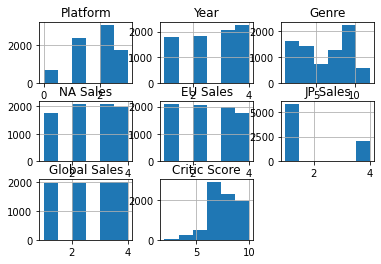

In [ ]:
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt


%matplotlib inline

df.hist(bins=6)

In [ ]:
df.corr()

,Platform,Year,Genre,NA Sales,EU Sales,JP Sales,Global Sales,Critic Score
Platform,1.000000,-0.031322,-0.084833,0.232300,0.111282,0.066259,0.182769,-0.012252
Year,-0.031322,1.000000,0.127945,0.020971,0.092050,0.196830,0.095303,-0.001691
Genre,-0.084833,0.127945,1.000000,-0.090563,0.003969,0.047641,-0.067684,-0.080935
NA Sales,0.232300,0.020971,-0.090563,1.000000,0.589380,0.239714,0.857189,0.285901
EU Sales,0.111282,0.092050,0.003969,0.589380,1.000000,0.242686,0.743709,0.341938
JP Sales,0.066259,0.196830,0.047641,0.239714,0.242686,1.000000,0.372996,0.237924
Global Sales,0.182769,0.095303,-0.067684,0.857189,0.743709,0.372996,1.000000,0.358111
Critic Score,-0.012252,-0.001691,-0.080935,0.285901,0.341938,0.237924,0.358111,1.000000


In [ ]:
df.cov()

,Platform,Year,Genre,NA Sales,EU Sales,JP Sales,Global Sales,Critic Score
Platform,0.802949,-0.031474,-0.255527,0.227111,0.110518,0.078254,0.182972,-0.015720
Year,-0.031474,1.257569,0.482301,0.025659,0.114408,0.290921,0.119401,-0.002715
Genre,-0.255527,0.482301,11.299399,-0.332142,0.014788,0.211068,-0.254187,-0.389554
NA Sales,0.227111,0.025659,-0.332142,1.190388,0.712697,0.344710,1.044863,0.446645
EU Sales,0.110518,0.114408,0.014788,0.712697,1.228375,0.354508,0.920888,0.542645
JP Sales,0.078254,0.290921,0.211068,0.344710,0.354508,1.737132,0.549236,0.449012
Global Sales,0.182972,0.119401,-0.254187,1.044863,0.920888,0.549236,1.248178,0.572873
Critic Score,-0.015720,-0.002715,-0.389554,0.446645,0.542645,0.449012,0.572873,2.050244


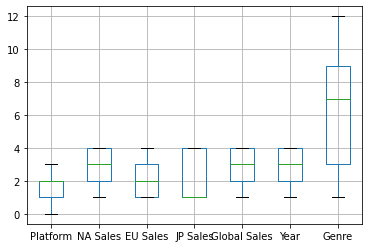

In [ ]:
columns = ['Platform', 'NA Sales', 'EU Sales', 'JP Sales', 'Global Sales', 'Year', 'Genre']
df.boxplot(columns)

In [ ]:
# classifying
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# pretty printing
from pprint import pprint

# visualizing
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [ ]:
feature_cols = ['Global Sales','Year', 'Genre', 'Platform']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df[feature_cols], df['Critic Score'], shuffle=True, test_size=0.15, random_state=20)
x_train.shape, y_train.shape

((6715, 4), (6715,))

Text(0, 0.5, 'Accuracy')

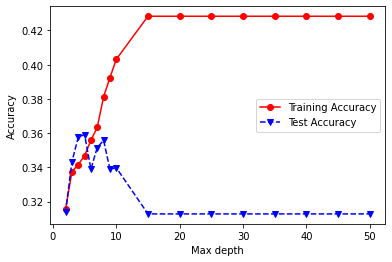

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(x_train, y_train)
    y_predTrain = clf.predict(x_train)
    y_predTest = clf.predict(x_test)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    index += 1



plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

In [ ]:
from sklearn import tree
import graphviz

clf_dt = DecisionTreeClassifier(criterion="entropy")
clf_dt.fit(x_train,y_train)

y_train_pred = clf_dt.predict(x_train);
y_test = clf_dt.predict(x_test);
a_dt_train = accuracy_score(y_train, y_train_pred);
print("Training data accuracy is " +  repr(a_dt_train))

Training data accuracy is 0.42829486224869695


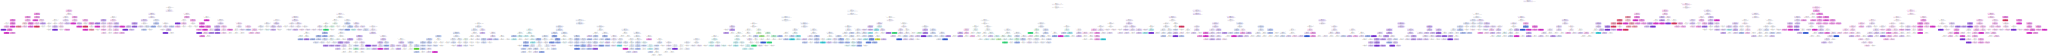

In [ ]:
dot_data = tree.export_graphviz(clf_dt, out_file=None,
                      feature_names = feature_cols,
                      class_names = ['10','20','30','40','50','60','70','80','90'],
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
graph.render("rating")

'rating.pdf'

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', random_state=0)

In [ ]:
model.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(multi_class='warn', random_state=0, solver='liblinear')

In [ ]:
model.score(x_test, y_test)

0.3811129848229342

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        38
           6       0.00      0.00      0.00       131
           7       0.33      0.27      0.30       347
           8       0.33      0.52      0.41       394
           9       0.53      0.59      0.56       259
          10       0.00      0.00      0.00         6

    accuracy                           0.38      1186
   macro avg       0.15      0.17      0.16      1186
weighted avg       0.32      0.38      0.34      1186



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, model.predict(x_test)))

[[  0   0   0   0   3   1   0   0]
 [  0   0   0   0   7   0   0   0]
 [  0   0   0   0  29   9   0   0]
 [  0   0   0   0  56  74   1   0]
 [  0   0   0   0  93 227  27   0]
 [  0   0   0   0  86 205 103   0]
 [  0   0   0   0   8  97 154   0]
 [  0   0   0   0   1   0   5   0]]


In [ ]:
# Further Logistic Regression


# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

# fit the model with data
logreg.fit(x_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
x_test

,Global Sales,Year,Genre,Platform
4067,3,3,1,1
680,4,4,1,3
8454,2,4,4,1
4219,3,1,6,1
12504,1,4,11,0
...,...,...,...,...
3202,3,3,3,2
14073,1,3,11,1
13473,1,1,8,0
1865,4,1,4,1


In [ ]:
#based on previous samples we can get the predicted result
logreg.predict(x_test)

array([8, 9, 8, ..., 7, 9, 8])

In [ ]:
logreg.score(x_test, y_test)

0.3802698145025295